In [6]:
from pyscf import gto, scf
import matplotlib.pyplot as plt

In [2]:
# Константа для перекладу Hartree → eV
HARTREE_TO_EV = 27.211386245988

In [3]:
# Список базисов для сравнения
basis_set_list = ['STO-3G', '6-31G', '6-31G(d)', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ']

In [4]:
energies_hartree = []
energies_ev = []

print(f"{'Базис':<10} {'E(Hartree)':>12} {'E(eV)':>12}")
print("-"*36)

for basis in basis_set_list:
    mol = gto.M(atom='H 0 0 0',
                charge=0,
                spin=1,      # один електрон → Nα-Nβ=1
                unit='Bohr',
                basis=basis)
    mf = scf.UHF(mol)
    mf.verbose = 0
    energy_hartree = mf.kernel()
    energy_ev = energy_hartree * HARTREE_TO_EV
    energies_hartree.append(energy_hartree)
    energies_ev.append(energy_ev)
    print(f"{basis:<10} {energy_hartree:12.6f} {energy_ev:12.6f}")

Базис        E(Hartree)        E(eV)
------------------------------------
STO-3G        -0.466582   -12.696339
6-31G         -0.498233   -13.557608
6-31G(d)      -0.498233   -13.557608
cc-pVDZ       -0.499278   -13.586057
cc-pVTZ       -0.499810   -13.600518
cc-pVQZ       -0.499946   -13.604212


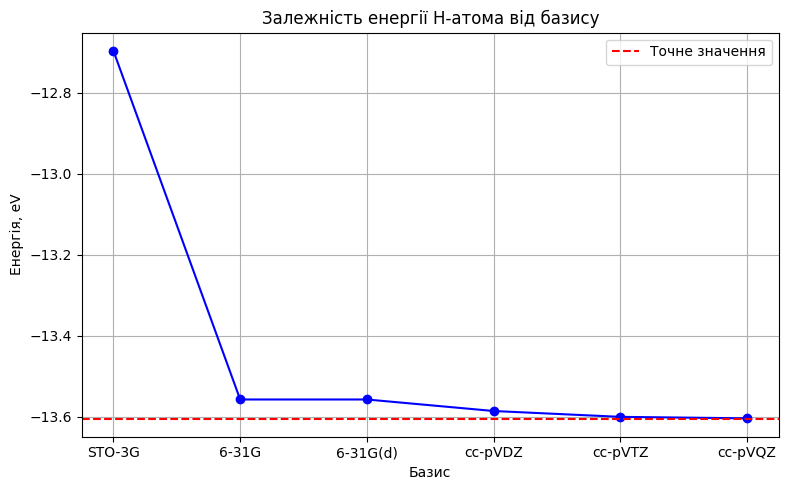

In [5]:
# График зависимости энергии от базиса
plt.figure(figsize=(8,5))
plt.plot(basis_set_list, energies_ev, marker='o', linestyle='-', color='blue')
plt.axhline(-13.6057, color='red', linestyle='--', label='Точне значення')
plt.xlabel('Базис')
plt.ylabel('Енергія, eV')
plt.title('Залежність енергії H-атома від базису')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
